**IMDB Duygu Analizi**


---




Bu projede, IMDB veri seti kullanarak film yorumlarında duygu analizini gerçekleştireceğiz. Duygu analizi, bir metnin ifade ettiği duygu veya düşünceyi anlamamızı sağlayan bir NLP (Doğal Dil İşleme) tekniği. Yani burada, insanların film incelemelerinde dile getirdikleri duyguları inceleyip, bunların olumlu mu yoksa olumsuz mu olduğunu sınıflandıracağız. Bu sayede, izleyicilerin film hakkındaki görüşlerini ve genel olarak nasıl hissettiklerini daha iyi anlayabileceğiz.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow.keras.datasets import imdb

# Veri Setini Bölme


In [5]:
(x_train , y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [6]:
x_train.shape, y_train.shape, x_test.shape , y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [7]:
class_names = ['Negative', ' Positive']

In [8]:
word_index = imdb.get_word_index()

# Çözümleme

In [9]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

In [10]:
def show_lengths():
    print('Length of 1st training example: ', len(x_train[0]))
    print('Length of 2nd training example: ',  len(x_train[1]))
    print('Length of 1st test example: ', len(x_test[0]))
    print('Length of 2nd test example: ',  len(x_test[1]))

show_lengths()

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260


# Padding

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_train = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

# Model Oluşturma

In [12]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [17]:
model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [18]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# Eğitim Modeli

In [20]:


from tensorflow.keras.callbacks import LambdaCallback

simple_logging = LambdaCallback(on_epoch_end=lambda e, l: print(e, end='.'))

E = 20
h = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=E,
    callbacks=[simple_logging],
    verbose=0  # verbose=False yerine 0 kullanıyoruz.
)


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

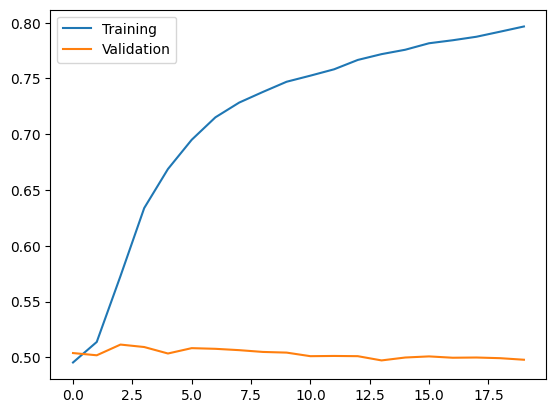

In [21]:
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

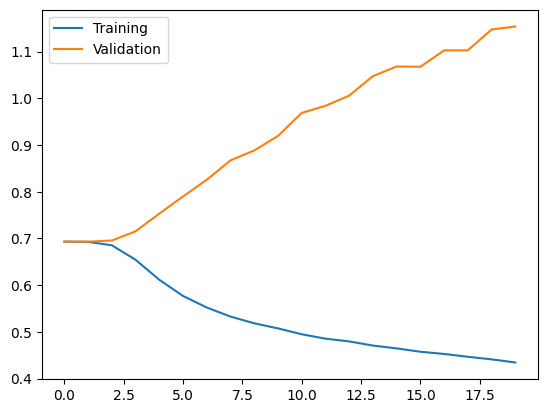

In [22]:
plt.plot(range(E), h.history['loss'], label = 'Training')
plt.plot(range(E), h.history['val_loss'], label = 'Validation')
plt.legend()
plt.show()

# Test Etme

In [29]:
;#loss, acc = model.evaluate(x_test, y_test)
#print('Test set accuracy: ', acc * 100)

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Test verilerini dönüştürme
x_test = pad_sequences(x_test, maxlen=100)
x_test = np.array(x_test, dtype='int32')
y_test = np.array(y_test, dtype='float32')

# Modeli değerlendirme
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc * 100)



782/782 [==============================] - 1s 1ms/step - loss: 1.6609 - accuracy: 0.5072
Test set accuracy:  50.72000026702881


In [28]:
prediction = model.predict(np.expand_dims(x_test[0], axis = 0))
class_names = ['Negative', 'Positive']
print(class_names[np.argmax(prediction[0])])

Negative
